In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [3]:

df = pd.read_csv("C:/Users/harsh/Downloads/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Convert categorical Gender column to numerical
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Select features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


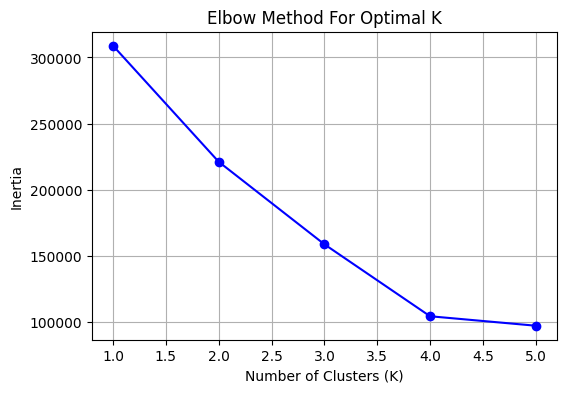

In [5]:
inertia = []
K_range = range(1, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


In [6]:
# Assuming from Elbow plot that K=2 is optimal
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X)

df[['CustomerID', 'Cluster']]


,CustomerID,Cluster
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
195,196,1
196,197,1
197,198,1
198,199,1


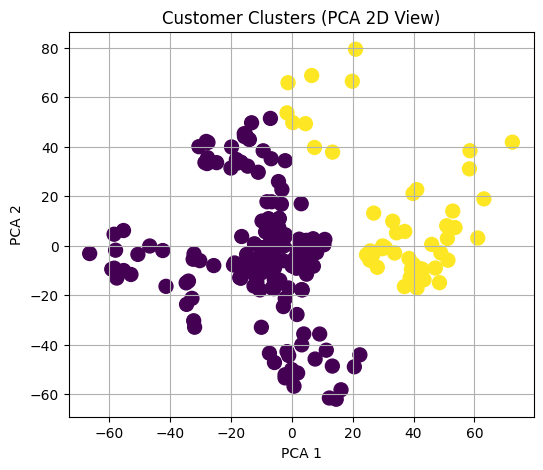

In [7]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Customer Clusters (PCA 2D View)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [8]:
score = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.33


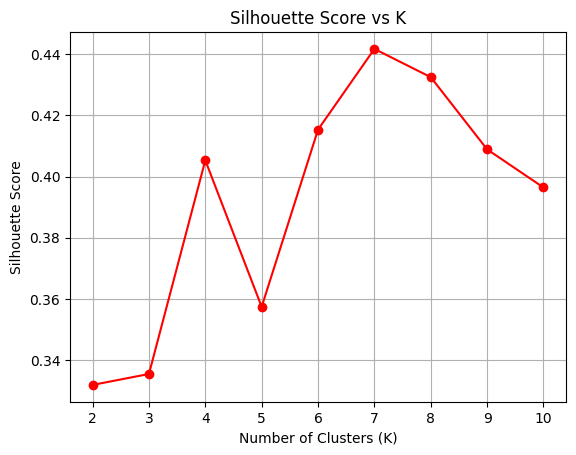

In [9]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X)  # Or X_scaled if using StandardScaler


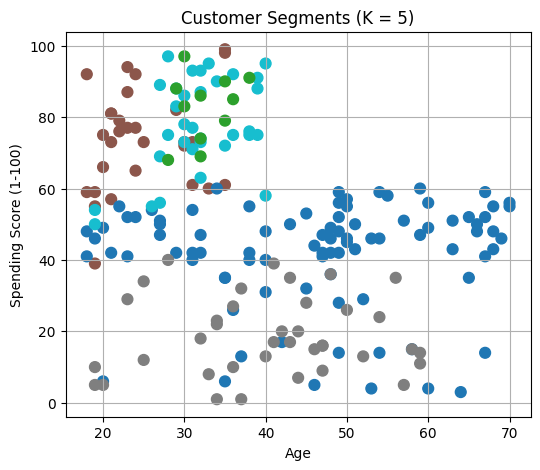

In [11]:
plt.figure(figsize=(6, 5))
plt.scatter(X['Age'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='tab10', s=60)
plt.title("Customer Segments (K = 5)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()
